# Limitation of selecting feature using a model

In this notebook, we want to show a limitation when using a machine-learning
model to make a selection.

Indeed, one can inspect a model and find relative feature importances. For
instance, the parameters `coef_` for the linear models or
`feature_importances_` for the tree-based models carries such information.
Therefore, this method works as far as the relative feature importances given
by the model is sufficient to select the meaningful feature.

Here, we will generate a dataset that contains a large number of random
features.

In [1]:
from sklearn.datasets import make_classification

data, target = make_classification(
    n_samples=5000,
    n_features=100,
    n_informative=2,
    n_redundant=5,
    n_repeated=5,
    class_sep=0.3,
    random_state=0,
)

First, let's build a model which will not make any features selection.

In [2]:
from sklearn.ensemble import RandomForestClassifier

model_without_selection = RandomForestClassifier()

We will evaluate this model by a k-fold cross validation and store the
results in a pandas dataframe.

In [3]:
import pandas as pd
from sklearn.model_selection import cross_validate

cv_results_without_selection = cross_validate(
    model_without_selection, data, target, cv=5)
cv_results_without_selection = pd.DataFrame(cv_results_without_selection)

Then, we will build another model which will include a feature selection
step based on a random forest and evaluate it as well with cross-validation.

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel

feature_selector = SelectFromModel(RandomForestClassifier())
model_with_selection = make_pipeline(
    feature_selector, RandomForestClassifier())

In [5]:
cv_results_with_selection = cross_validate(model_with_selection, data, target,
                                           cv=5)
cv_results_with_selection = pd.DataFrame(cv_results_with_selection)

We can compare the testing score of the two models. For this matter,
we are combining results in a single dataframe.

In [6]:
cv_results = pd.concat(
    [cv_results_without_selection, cv_results_with_selection],
    axis=1,
    keys=["Without feature selection", "With feature selection"],
).swaplevel(axis="columns")

Finally, we can check the testing score of each the model.

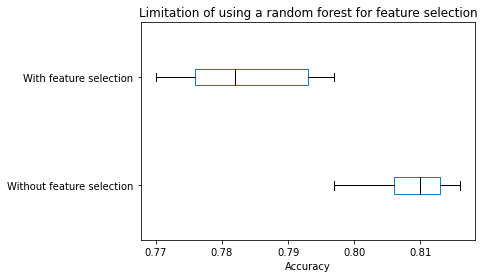

In [7]:
import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
cv_results["test_score"].plot.box(color=color, vert=False)
plt.xlabel("Accuracy")
_ = plt.title("Limitation of using a random forest for feature selection")

The model that selected a subset of feature is less performant than a
random forest fitted on the full dataset.

We can rely on some aspects tackled in the notebook presenting the model
inspection to explain this behaviour. The decision tree's relative feature
importance will overestimate the importance of random feature when the
decision tree overfits the training set.

Therefore, it is good to keep in mind that feature selection relies on
procedures making some assumptions, which can be perfectible.